# Downloading Dataset

In [0]:
!pip install PyDrive

import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

download = drive.CreateFile({'id': '1vXk-f0kSwLWVORZwqjPJY4fC9EVNlsMN'})
download.GetContentFile('all.zip')

!unzip all.zip
images_dir = os.listdir("Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/")
print (len(images_dir))

     |████████████████████████████████| 993kB 9.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive
Archive:  all.zip
   creating: Data files/
   creating: Flickr8k/
   creating: Flickr8k/Flickr8k_Dataset/
   creating: Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/
  inflating: Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/1003163366_44323f5815.jpg  
  inflating: Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/1022975728_75515238d8.jpg  
  inflating: Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/1026685415_0431cbf574.jpg  
  inflating: Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/1045521051_108ebc19be.jpg  
  inflating: Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/1053804096_ad278b25f1.jpg  
  inflating: Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/1067790824_f3cc97239b.jpg  
  inflating: Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/1072153132_53d2bb1b60.jpg  
  inflating: Flickr8k/Flickr8k_Dataset/Flicker8k_Dat

# Data Split

In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [18]:
images_dir = os.listdir("Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/")

images_path = 'Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/'
captions_path = 'Flickr8k/Flickr8k_text/Flickr8k.token.txt'
train_path = 'Flickr8k/Flickr8k_text/Flickr_8k.trainImages.txt'
val_path = 'Flickr8k/Flickr8k_text/Flickr_8k.devImages.txt'
test_path = 'Flickr8k/Flickr8k_text/Flickr_8k.testImages.txt'

captions = open(captions_path, 'r').read().split("\n")
x_train = open(train_path, 'r').read().split("\n")
x_val = open(val_path, 'r').read().split("\n")
x_test = open(test_path, 'r').read().split("\n")


print (len(captions))
print (len(x_train))
print (len(x_val))
print (len(x_test))

40460
6000
1000
1000


In [19]:
print (captions[0])
print (x_train[0])
print (x_val[0])
print (x_test[0])

1000268201_693b08cb0e.jpg#0	A child in a pink dress is climbing up a set of stairs in an entry way .
2513260012_03d33305cf.jpg
2090545563_a4e66ec76b.jpg
3385593926_d3e9c21170.jpg


In [20]:
temp = captions[0].split('#')
print (temp)
print (temp[0])
print (temp[1])
print (temp[1][2:])

['1000268201_693b08cb0e.jpg', '0\tA child in a pink dress is climbing up a set of stairs in an entry way .']
1000268201_693b08cb0e.jpg
0	A child in a pink dress is climbing up a set of stairs in an entry way .
A child in a pink dress is climbing up a set of stairs in an entry way .


In [0]:
#creating a dictionary for all images and respective descriptions
tokens = {}
for ix in range(len(captions)):
    temp = captions[ix].split("#")
    if temp[0] in tokens:
        tokens[temp[0]].append(temp[1][2:])
    else:
        tokens[temp[0]] = [temp[1][2:]]

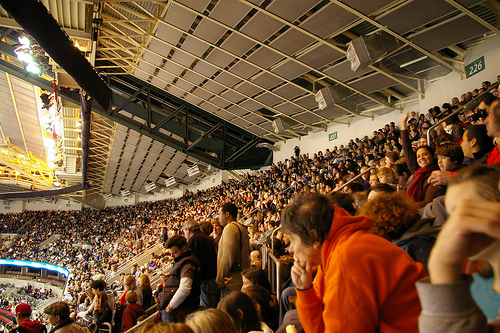

2252123185_487f21e336.jpg
A bunch on people are seated in a stadium .
A crowded stadium is full of people watching an event .
A crowd of people fill up a packed stadium .
A crowd sitting in an indoor stadium .
A stadium full of people watch a game .


In [22]:
# 0th image of train dataset
#temp = x_train[0].split("#")


temp = "2252123185_487f21e336.jpg".split("#")

from IPython.display import Image, display
z = Image(filename=images_path+temp[0])
display(z)



print (temp[0])
for ix in range(len(tokens[temp[0]])):
    print (tokens[temp[0]][ix])

In [23]:
train_dataset = open('Data files/flickr_8k_train_dataset.txt','w')
train_dataset.write("image_id\tcaptions\n")

val_dataset = open('Data files/flickr_8k_val_dataset.txt','w')
val_dataset.write("image_id\tcaptions\n")

test_dataset = open('Data files/flickr_8k_test_dataset.txt','w')
test_dataset.write("image_id\tcaptions\n")

18

In [24]:
img = x_train[0]
print (img)
print (tokens[img])

2513260012_03d33305cf.jpg
['A black dog is running after a white dog in the snow .', 'Black dog chasing brown dog through snow', 'Two dogs chase each other across the snowy ground .', 'Two dogs play together in the snow .', 'Two dogs running through a low lying body of water .']


In [0]:
for img in x_train:
    if img == '':
        continue
    for capt in tokens[img]:
        caption = "<start> "+ capt + " <end>"
        train_dataset.write(img+"\t"+caption+"\n")
        train_dataset.flush()
train_dataset.close()

In [0]:
for img in x_test:
    if img == '':
        continue
    for capt in tokens[img]:
        caption = "<start> "+ capt + " <end>"
        test_dataset.write(img+"\t"+caption+"\n")
        test_dataset.flush()
test_dataset.close()

In [0]:
for img in x_val:
    if img == '':
        continue
    for capt in tokens[img]:
        caption = "<start> "+ capt + " <end>"
        val_dataset.write(img+"\t"+caption+"\n")
        val_dataset.flush()
val_dataset.close()

# Get image Embeddings

In [0]:
import pickle
import numpy as np
import os
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.optimizers import Adam
from keras.layers import Dense,Activation,Flatten,Input,Dropout,GlobalAveragePooling2D
from keras.models import Model
from keras.utils import np_utils
import random
import matplotlib.pyplot as plt

In [0]:
images_dir = os.listdir("Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/")

images_path = 'Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/'
captions_path = 'Flickr8k/Flickr8k_text/Flickr8k.token.txt'
train_path = 'Flickr8k/Flickr8k_text/Flickr_8k.trainImages.txt'
val_path = 'Flickr8k/Flickr8k_text/Flickr_8k.devImages.txt'
test_path = 'Flickr8k/Flickr8k_text/Flickr_8k.testImages.txt'

captions = open(captions_path, 'r').read().split("\n")
x_train = open(train_path, 'r').read().split("\n")
x_val = open(val_path, 'r').read().split("\n")
x_test = x_val = open(test_path, 'r').read().split("\n")


print (len(captions))
print (len(x_train))
print (len(x_val))
print (len(x_test))

40460
6000
1000
1000


In [0]:
model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3), pooling = 'avg')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
def preprocessing(img_path):
    im = image.load_img(img_path, target_size=(224,224,3))
    im = image.img_to_array(im)
    im = np.expand_dims(im, axis=0)
    return im

In [0]:
train_data = {}
ctr = 0
for ix in x_train:
    if ix == "":
        continue
    if ctr%100==0:
        print(ctr)
    ctr+=1
    path = images_path + ix
    img = preprocessing(path)
    pred = model.predict(img).reshape(2048)
    train_data[ix] = pred

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900


In [0]:
len(train_data)

6000

In [0]:
with open( "Weights/train_encoded_images.p", "wb" ) as pickle_f:
    pickle.dump(train_data, pickle_f )

# Preprocessing

In [0]:
import pandas as pd
import numpy as np
import pickle
from keras.preprocessing import image, sequence

In [0]:
pd_dataset = pd.read_csv("Data files/flickr_8k_train_dataset.txt", delimiter='\t')
ds = pd_dataset.values
print (ds.shape)

(30000, 2)


In [0]:
sentences = []
for ix in range(ds.shape[0]):
    sentences.append(ds[ix, 1])
    
print (len(sentences))

30000


In [0]:
words = [i.split() for i in sentences]

In [0]:
unique = []
for i in words:
    unique.extend(i)

In [0]:
unique = list(set(unique))
print (len(unique))

vocab_size = len(unique)

8253


In [0]:
unique.insert(0,'UNK')

In [0]:
#Vectorization
word_2_indices = {val:index for index, val in enumerate(unique)}
indices_2_word = {index:val for index, val in enumerate(unique)}

In [0]:
with open('Weights/w2i', 'wb') as w2i:
    pickle.dump(word_2_indices, w2i, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('Weights/i2w', 'wb') as i2w:
    pickle.dump(indices_2_word, i2w, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
vocab_size = len(word_2_indices.keys())
print (vocab_size)

8254


In [0]:
max_len = 0
lengths = []
for i in sentences:
    i = i.split()
    lengths.append(len(i))
    if len(i) > max_len:
        max_len = len(i)

print (max_len)

print (len(lengths))

40
30000


In [0]:
t = {}

for i in lengths:
  if t.get(i) is None:
    t[i]=1
  else:
    t[i] = t[i]+1

In [0]:
t

{3: 1,
 4: 10,
 5: 28,
 6: 178,
 7: 402,
 8: 974,
 9: 2003,
 10: 2574,
 11: 2878,
 12: 3220,
 13: 3184,
 14: 3060,
 15: 2696,
 16: 2300,
 17: 1832,
 18: 1331,
 19: 949,
 20: 703,
 21: 536,
 22: 372,
 23: 243,
 24: 138,
 25: 136,
 26: 85,
 27: 54,
 28: 40,
 29: 26,
 30: 17,
 31: 5,
 32: 8,
 33: 7,
 34: 4,
 35: 2,
 36: 2,
 37: 1,
 40: 1}

In [0]:
padded_sequences, subsequent_words = [], []

for ix in range(ds.shape[0]):
    partial_seqs = []
    next_words = []
    text = ds[ix, 1].split()
    text = [word_2_indices[i] for i in text]
    for i in range(1, len(text)):
        partial_seqs.append(text[:i])
        next_words.append(text[i])
    padded_partial_seqs = sequence.pad_sequences(partial_seqs, max_len, padding='post')

    next_words_1hot = np.zeros([len(next_words), vocab_size], dtype=np.bool)
    
    #Vectorization
    for i,next_word in enumerate(next_words):
        next_words_1hot[i, next_word] = 1
        
    padded_sequences.append(padded_partial_seqs)
    subsequent_words.append(next_words_1hot)
    
padded_sequences = np.asarray(padded_sequences)
subsequent_words = np.asarray(subsequent_words)

print (padded_sequences.shape)
print (subsequent_words.shape)

(30000,)
(30000,)


In [0]:
print (padded_sequences[0])

[[2317    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [2317 4155    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [2317 4155  292    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [2317 4155  292 2967    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [2317 4155  292 2967 6514    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0  

In [0]:
for ix in range(len(padded_sequences[0])):
    for iy in range(max_len):
        print (indices_2_word[padded_sequences[0][ix][iy]], end = ' ')
    print ("\n")

print (len(padded_sequences[0]))

<start> UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK 

<start> A UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK 

<start> A black UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK 

<start> A black dog UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK 

<start> A black dog is UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK 

<start> A black dog is running UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK 

<sta

In [0]:
num_of_images = 200

In [0]:
captions = np.zeros([0, max_len])
next_words = np.zeros([0, vocab_size])

for ix in range(num_of_images):
    #print (img_to_padded_seqs.shape[0])
    captions = np.concatenate([captions, padded_sequences[ix]])
    next_words = np.concatenate([next_words, subsequent_words[ix]])
    print (ix)

np.save("Data files/captions.npy", captions)
np.save("Data files/next_words.npy", next_words)

print (captions.shape)
print (next_words.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
(2707, 40)
(2707, 8254)


In [0]:
with open('Weights/train_encoded_images.p', 'rb') as f:
        encoded_images = pickle.load(f)

In [0]:
imgs = []

for ix in range(ds.shape[0]):
    if ds[ix, 0] in encoded_images.keys():
        imgs.append(list(encoded_images[ds[ix, 0]]))

imgs = np.asarray(imgs)
print (imgs.shape)

(30000, 2048)


In [0]:
images = []

for ix in range(num_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        images.append(imgs[ix])
        
images = np.asarray(images)

np.save("Data files/images.npy", images)

print (images.shape)

(2707, 2048)


In [0]:
image_names = []

for ix in range(num_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        image_names.append(ds[ix, 0])
        
image_names = np.asarray(image_names)

np.save("Data files/image_names.npy", image_names)

print (len(image_names))

2707


# Final Model

In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [0]:
from keras.utils import plot_model
from keras.preprocessing import image, sequence
from keras.layers import Dense, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector
from keras.layers import concatenate, Input
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.applications import ResNet50

In [0]:
from keras.models import Model
from keras.callbacks import ModelCheckpoint, TensorBoard

In [0]:
from time import time

In [0]:
with open('Weights/i2w', 'rb') as i2w:
    indices_2_word = pickle.load(i2w)
    
with open('Weights/w2i', 'rb') as w2i:
    word_2_indices = pickle.load(w2i)

In [0]:
vocab_size = len(word_2_indices.keys())
print (vocab_size)

8254


In [0]:
captions = np.load("Data files/captions.npy")
next_words = np.load("Data files/next_words.npy")

print (captions.shape)
print (next_words.shape)

(2707, 40)
(2707, 8254)


In [0]:
images = np.load("Data files/images.npy")

print (images.shape)

(2707, 2048)


In [0]:
imag = np.load("Data files/image_names.npy")
        
print (imag.shape)

(2707,)


In [0]:
embedding_size = 128
max_len = 40

In [0]:
input1 = Input(shape=(2048,))

model1_dense1 = Dense(1024, input_shape=(2048,), activation='relu')(input1)
model1_dense2 = Dense(embedding_size, input_shape=(1024,), activation='relu')(model1_dense1)
model1_rep1 = RepeatVector(max_len)(model1_dense2)

model1 = Model(inputs=input1, outputs=model1_rep1)
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_4 (Dense)              (None, 128)               131200    
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 40, 128)           0         
Total params: 2,229,376
Trainable params: 2,229,376
Non-trainable params: 0
_________________________________________________________________


In [0]:
input2 = Input(shape=(max_len,))
model2_emb1 = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len)(input2)
model2_lstm1 = LSTM(256, return_sequences=True)(model2_emb1)
model2_timeDist1 = TimeDistributed(Dense(embedding_size))(model2_lstm1)
                                   
model2 = Model(inputs=input2, outputs=model2_timeDist1)
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 40)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 40, 128)           1056512   
_________________________________________________________________
lstm_1 (LSTM)                (None, 40, 256)           394240    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 40, 128)           32896     
Total params: 1,483,648
Trainable params: 1,483,648
Non-trainable params: 0
_________________________________________________________________


In [0]:
concat = concatenate([model1_rep1, model2_timeDist1])
final_lstm1 = LSTM(128, return_sequences=True)(concat)
final_lstm2 = LSTM(512, return_sequences=False)(final_lstm1)
final_dense = Dense(vocab_size, activation='softmax')(final_lstm2)
model = Model(inputs=[input1, input2], outputs=final_dense)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 1024)         2098176     input_4[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 40, 128)      1056512     input_5[0][0]                    
__________________________________________________________________________________________________
dense_4 (D

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [0]:
logctr = 0
tensorboard = TensorBoard(log_dir="logs{}/{}".format(logctr, time()), batch_size=512, write_images=True, )

In [0]:
wtctr=0

**Main Model 2000 images 100 epochs yg3752 rms with gpu**


In [0]:
for i in range(5):
  if os.path.isfile('Weights/model_weights{}.h5'.format(wtctr)):
    model.load_weights('Weights/model_weights{}.h5'.format(wtctr))
    print ('*'*30)
    print ('loaded', 'Weights/model_weights{}.h5'.format(wtctr))

  hist = model.fit([images, captions], next_words, batch_size=512, epochs=20, callbacks=([tensorboard]))

  wtctr+=20
  model.save_weights("Weights/model_weights{}.h5".format(wtctr))
  print ('*'*30)
  print ('saved', 'Weights/model_weights{}.h5'.format(wtctr))
  
  plot_model(model, show_shapes=True, to_file='plot.png')
  
  !cp -rn Weights gdrive/My\ Drive/Model_weights_logs
  !cp -rn logs0 gdrive/My\ Drive/Model_weights_logs

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
2707/2707 [==============================] - 4s 1ms/step - loss: 7.2422 - acc: 0.0584
Epoch 2/20
2707/2707 [==============================] - 1s 528us/step - loss: 5.1981 - acc: 0.0635
Epoch 3/20
2707/2707 [==============================] - 1s 522us/step - loss: 5.0719 - acc: 0.0595
Epoch 4/20
2707/2707 [==============================] - 1s 528us/step - loss: 5.0276 - acc: 0.0658
Epoch 5/20
2707/2707 [==============================] - 1s 530us/step - loss: 5.0162 - acc: 0.0691
Epoch 6/20
2707/2707 [==============================] - 1s 528us/step - loss: 5.0017 - acc: 0.0743
Epoch 7/20
2707/2707 [==============================] - 1s 524us/step - loss: 4.9918 - acc: 0.0658
Epoch 8/20
2707/2707 [==============================] - 1s 529us/step - loss: 4.9931 - acc: 0.0672
Epoch 9/20
2707/2707 [==============================] - 1s 529us/step - loss: 4.9871 - acc: 0.0691
Epoch 10/20
2707/2707 [==============================] - 1s 527

In [0]:
model_json = model.to_json()
with open("Model/model.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
plot_model(model, show_shapes=True, to_file='plot1.png')

In [0]:
#from google.colab import drive
#drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [0]:
#!mkdir gdrive/My\ Drive/weights_2500

In [0]:
#!cp -rn 'Data files' gdrive/My\ Drive/weights_2500

In [0]:
#!cp -rn Model gdrive/My\ Drive/weights_2500

cp: cannot create directory 'gdrive/My Drive/weights_2500': No such file or directory


In [0]:
#!cp -rn Weights gdrive/My\ Drive/weights_2500

In [0]:
#!cp -rn logs0 gdrive/My\ Drive/weights_2500

# Predictions

In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from IPython.display import Image, display

In [2]:
from keras.preprocessing import image, sequence
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.applications import ResNet50

Using TensorFlow backend.


In [0]:
from keras.models import model_from_json

In [5]:
with open('Weights/i2w', 'rb') as i2w:
    indices_2_word = pickle.load(i2w)
    
with open('Weights/w2i', 'rb') as w2i:
    word_2_indices = pickle.load(w2i)

vocab_size = len(word_2_indices.keys())
print (vocab_size)

8254


In [0]:
embedding_size = 128
max_len = 40

In [7]:
resnet = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3), pooling = 'avg')
resnet.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
_____________________________________

In [8]:
#load model
json_file = open('Model/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 1024)         2098176     input_4[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 40, 128)      1056512     input_5[0][0]                    
__________________________________________________________________________________________________
dense_4 (D

In [0]:
# load weights into new model
model.load_weights("Weights/model_weights100.h5")

In [0]:
def preprocessing(img_path):
    im = image.load_img(img_path, target_size=(224,224,3))
    im = image.img_to_array(im)
    im = np.expand_dims(im, axis=0)
    return im

In [0]:
def get_encoding(model, img):
    image = preprocessing(img)
    pred = model.predict(image).reshape(2048)
    return pred

In [0]:
#img = "Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/146098876_0d99d7fb98.jpg"
img = "Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/1390268323_2c8204e91c.jpg"
#img = "Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/488416045_1c6d903fe0.jpg"
#img = "Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/2644326817_8f45080b87.jpg"
#img = "Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/218342358_1755a9cce1.jpg"
#img = "Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/2102315758_a9148a842f.jpg"
#img = "Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/2333584535_1eaf9baf3e.jpg"
#img = "Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/3406116788_c8f62e32d1.jpg"
#img = "Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/421808539_57abee6d55.jpg"
#img = "Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/55473406_1d2271c1f2.jpg"


test_img = get_encoding(resnet, img)

In [0]:
def predict_captions(image):
    start_word = ["<start>"]
    while True:
        par_caps = [word_2_indices[i] for i in start_word]
        par_caps = sequence.pad_sequences([par_caps], maxlen=max_len, padding='post')
        preds = model.predict([np.array([image]), np.array(par_caps)])
        word_pred = indices_2_word[np.argmax(preds[0])]
        start_word.append(word_pred)
        
        if word_pred == "<end>" or len(start_word) > max_len:
            break
            
    return ' '.join(start_word[1:-1])

Argmax_Search = predict_captions(test_img)

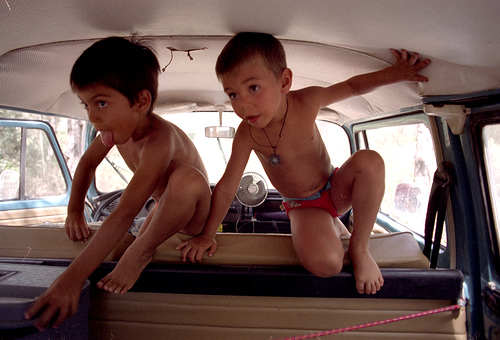

In [15]:
z = Image(filename=img)
display(z)

print (Argmax_Search)

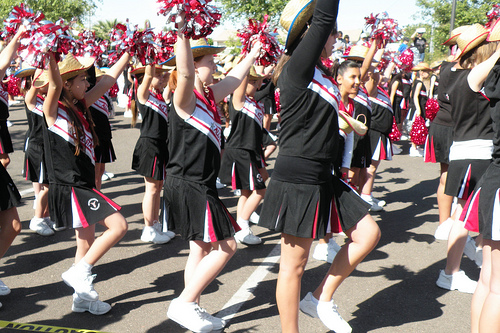

A bunch of girls in cheerleader outfits .


In [29]:
temp = x_train[11].split("#")
from IPython.display import Image, display
z = Image(filename=images_path+temp[0])
display(z)

#print (temp[0])
for ix in range(len(tokens[temp[0]])):
    print (tokens[temp[0]][ix])
    break